# Import thư viện

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [8]:
df = pd.read_csv(r'E:\AIRC_NCS_Research\CoChau\DataSet\data_so_AnKhe\KaNak.csv')

min = df['Mực nước hồ (m)'].min()
max = df['Mực nước hồ (m)'].max()

print('Min: ', min)
print('Max: ', max)

Min:  392.92
Max:  551.23


# Đánh giá ANOVA trên từng cặp mô hình

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Dữ liệu gốc
mae_data = np.array([
    [0.203071, 0.209247, 0.208268, 0.198832, 0.209090],
    [0.208629, 0.203071, 0.216112, 0.201372, 0.196714],
    [0.195585, 0.195771, 0.201765, 0.199459, 0.197479]
])

ts_data = np.array([
    [-0.036294, 0.355606, -0.001221, 0.048564, 0.349599],
    [-0.029781, 0.152856, 0.000457, 0.12311, 0.001048],
    [-0.033996, 0.088624, 0.034232, -0.060101, -0.117313]
])

# Tạo DataFrame theo định dạng long
models = ['RNN', 'LSTM', 'GRU']
metrics = ['MAE', 'TS']

records = []
for i, model in enumerate(models):
    for j, metric in enumerate(metrics):
        values = mae_data[i] if metric == 'MAE' else ts_data[i]
        for val in values:
            records.append({'model': model, 'metric': metric, 'value': val})

df = pd.DataFrame.from_records(records)

# Thực hiện Two-Way ANOVA (Type II)
formula = 'value ~ C(model) * C(metric)'
model_anova = smf.ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(model_anova, typ=2)

print(anova_table)


                      sum_sq    df          F    PR(>F)
C(model)            0.035718   2.0   2.109218  0.143265
C(metric)           0.156830   1.0  18.522305  0.000244
C(model):C(metric)  0.029822   2.0   1.761064  0.193353
Residual            0.203210  24.0        NaN       NaN


C:\Users\ductr\AppData\Local\Temp\ipykernel_13952\3338264550.py:5: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=df, x='metric', y='value', hue='model', dodge=True, capsize=.1, errwidth=1)


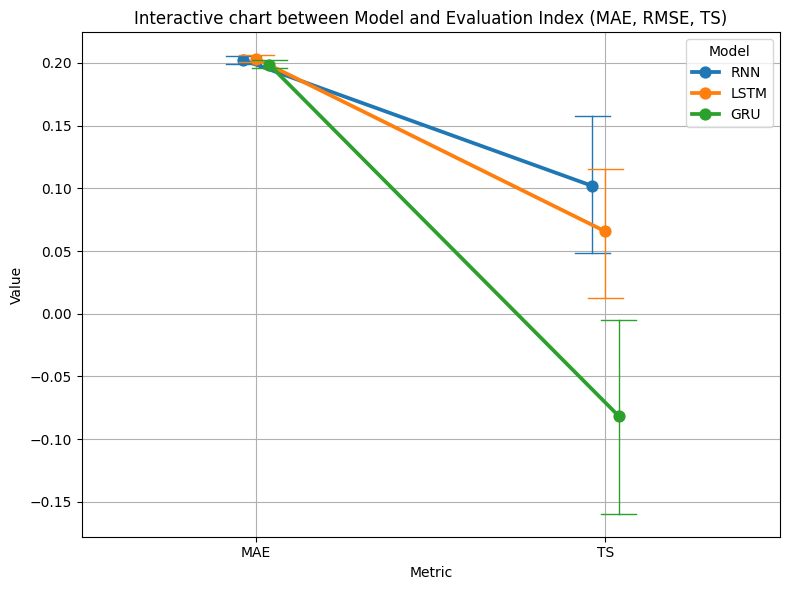

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.pointplot(data=df, x='metric', y='value', hue='model', dodge=True, capsize=.1, errwidth=1)
plt.title('Interactive chart between Model and Evaluation Index (MAE, RMSE, TS)')
plt.ylabel('Value')
plt.xlabel('Metric')
plt.legend(title='Model')
plt.grid(True)
plt.tight_layout()
plt.show()


### Đánh giá ANOVA 1 chiều cho MAE và TS riêng

In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ======== DỮ LIỆU GỐC ========
mae_data = np.array([
    [0.201562, 0.203726, 0.208741, 0.200245, 0.197137],  # RNN
    [0.207726, 0.205669, 0.202889, 0.199514, 0.201582],  # LSTM
    [0.197386, 0.196408, 0.205471, 0.19794, 0.195471],   # GRU
])

ts_data = np.array([
    [0.05282, 0.062263, 0.176976, 0.185118, 0.032343],       # RNN
    [0.036896, 0.143295, 0.090141, 0.099314, -0.041708],     # LSTM
    [-0.111729, 0.034366, -0.233906, -0.014729, -0.080987],  # GRU 
])

# ======== CHUYỂN ĐỔI DỮ LIỆU MAE và TS SANG LONG FORMAT ========
models = ['RNN', 'LSTM', 'GRU']
folds = 5

# MAE dataframe
mae_records = []
for model_idx, model in enumerate(models):
    for fold_idx in range(folds):
        mae_records.append({
            'model': model,
            'value': mae_data[model_idx, fold_idx]
        })
df_mae = pd.DataFrame(mae_records)

# TS dataframe
ts_records = []
for model_idx, model in enumerate(models):
    for fold_idx in range(folds):
        ts_records.append({
            'model': model,
            'value': ts_data[model_idx, fold_idx]
        })
df_ts = pd.DataFrame(ts_records)

# ======== ANOVA 1 CHIỀU CHO MAE ========
mae_model = ols('value ~ C(model)', data=df_mae).fit()
mae_anova = sm.stats.anova_lm(mae_model, typ=3)
print("\n📊 ANOVA một chiều: So sánh mô hình theo MAE:")
print(mae_anova)

# ======== ANOVA 1 CHIỀU CHO TS ========
ts_model = ols('value ~ C(model)', data=df_ts).fit()
ts_anova = sm.stats.anova_lm(ts_model, typ=2)
print("\n📊 ANOVA một chiều: So sánh mô hình theo TS (Tracking Signal):")
print(ts_anova)



📊 ANOVA một chiều: So sánh mô hình theo MAE:
             sum_sq    df             F        PR(>F)
Intercept  0.197081   1.0  13056.186481  1.352940e-19
C(model)   0.000066   2.0      2.201451  1.533075e-01
Residual   0.000181  12.0           NaN           NaN

📊 ANOVA một chiều: So sánh mô hình theo TS (Tracking Signal):
            sum_sq    df         F    PR(>F)
C(model)  0.094204   2.0  6.767637  0.010771
Residual  0.083519  12.0       NaN       NaN


In [7]:
from scipy.stats import shapiro

models = ['RNN', 'LSTM', 'GRU']

print("📊 KIỂM ĐỊNH SHAPIRO-WILK CHO MAE:")
for i, model in enumerate(models):
    stat, p = shapiro(mae_data[i])
    print(f"{model}: p = {p:.5f} {'✅ Chuẩn' if p > 0.05 else '❌ Không chuẩn'}")

print("\n📊 KIỂM ĐỊNH SHAPIRO-WILK CHO TS:")
for i, model in enumerate(models):
    stat, p = shapiro(ts_data[i])
    print(f"{model}: p = {p:.5f} {'✅ Chuẩn' if p > 0.05 else '❌ Không chuẩn'}")


📊 KIỂM ĐỊNH SHAPIRO-WILK CHO MAE:
RNN: p = 0.91247 ✅ Chuẩn
LSTM: p = 0.91899 ✅ Chuẩn
GRU: p = 0.04779 ❌ Không chuẩn

📊 KIỂM ĐỊNH SHAPIRO-WILK CHO TS:
RNN: p = 0.09557 ✅ Chuẩn
LSTM: p = 0.71673 ✅ Chuẩn
GRU: p = 0.86371 ✅ Chuẩn
